In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/U.S._Chronic_Disease_Indicators__CDI_.csv")
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN


In [3]:
question1 = 'Current smokeless tobacco use among youth'
question2 = "States with strong polices that require retail licenses to sell tobacco products"
year = 2015

In [4]:
youth_vaping = data[(data["Question"] == question1) & (data["YearStart"] == year)]
youth_vaping.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
1368,2015,2015,MT,Montana,YRBSS,Tobacco,Current smokeless tobacco use among youth,NaN,%,Crude Prevalence,...,30,TOB,TOB2_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
3763,2015,2015,FL,Florida,YRBSS,Tobacco,Current smokeless tobacco use among youth,NaN,%,Crude Prevalence,...,12,TOB,TOB2_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
3898,2015,2015,CO,Colorado,YRBSS,Tobacco,Current smokeless tobacco use among youth,NaN,%,Crude Prevalence,...,8,TOB,TOB2_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
12072,2015,2015,IA,Iowa,YRBSS,Tobacco,Current smokeless tobacco use among youth,NaN,%,Crude Prevalence,...,19,TOB,TOB2_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
13760,2015,2015,SC,South Carolina,YRBSS,Tobacco,Current smokeless tobacco use among youth,NaN,%,Crude Prevalence,...,45,TOB,TOB2_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [6]:
retail_licenses = data[(data["Question"] == question2) & (data["YearStart"] == year)]
retail_licenses.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
2825,2015,2015,MN,Minnesota,STATE,Tobacco,States with strong polices that require retail...,NaN,NaN,Yes/No,...,27,TOB,TOB5_0,YESNO,OVERALL,OVR,NaN,NaN,NaN,NaN
10213,2015,2015,HI,Hawaii,STATE,Tobacco,States with strong polices that require retail...,NaN,NaN,Yes/No,...,15,TOB,TOB5_0,YESNO,OVERALL,OVR,NaN,NaN,NaN,NaN
21266,2015,2015,NH,New Hampshire,STATE,Tobacco,States with strong polices that require retail...,NaN,NaN,Yes/No,...,33,TOB,TOB5_0,YESNO,OVERALL,OVR,NaN,NaN,NaN,NaN
31613,2015,2015,OK,Oklahoma,STATE,Tobacco,States with strong polices that require retail...,NaN,NaN,Yes/No,...,40,TOB,TOB5_0,YESNO,OVERALL,OVR,NaN,NaN,NaN,NaN
60960,2015,2015,NY,New York,STATE,Tobacco,States with strong polices that require retail...,NaN,NaN,Yes/No,...,36,TOB,TOB5_0,YESNO,OVERALL,OVR,NaN,NaN,NaN,NaN


# Drop states that have null data values

In [8]:
null_states = set(youth_vaping[youth_vaping["DataValue"].isnull()]["LocationDesc"].unique())
null_states

{'Colorado',
 'Connecticut',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Iowa',
 'Kansas',
 'Louisiana',
 'Minnesota',
 'New Jersey',
 'Ohio',
 'Oregon',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Washington',
 'Wisconsin'}

In [39]:
youth_vaping = youth_vaping[~youth_vaping["DataValue"].isnull()]
retail_licenses = retail_licenses[~retail_licenses["DataValue"].isnull()]

# Join dataframes

In [42]:
df = (youth_vaping[["LocationDesc", "DataValue"]].merge(retail_licenses[["LocationDesc", "DataValue"]],
                                                      on="LocationDesc")
                                                 .rename(columns={"DataValue_x":"Proportion",
                                                             "DataValue_y":"Law"})
                                                 .astype({"Proportion":np.float64}))
df

,LocationDesc,Proportion,Law
0,Montana,12.3,Yes
1,South Carolina,7.2,No
2,Michigan,6.2,No
3,Alabama,12.5,Yes
4,Mississippi,11.6,Yes
5,Tennessee,11.0,No
6,California,3.0,Yes
7,West Virginia,13.4,Yes
8,South Dakota,11.7,No
9,Maryland,5.8,Yes


# Compute test statistic

In [43]:
grouped = df.groupby("Law").mean()
grouped

,Proportion
Law,
No,8.707692
Yes,8.531818


In [14]:
def test_stat(df):
    """Calculates difference in means for given dataframe"""
    grouped = df.groupby("Law").mean()
    return float(grouped.loc["No"] - grouped.loc["Yes"])

In [15]:
observed = test_stat(df)
observed

0.17587412587412388

In [16]:
n_simulations = 1000
simulated = []
for i in range(n_simulations):
    shuffled = df.copy()
    shuffled["Law"] = shuffled["Law"].sample(frac=1, replace=False).reset_index(drop=True)
    simulated.append(test_stat(shuffled))
simulated = pd.Series(simulated)

Pval: 0.434000


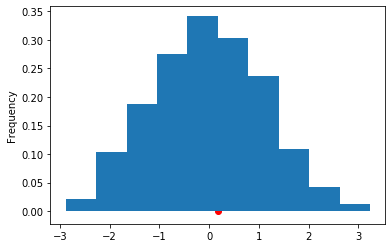

In [17]:
simulated.plot(kind="hist", density=True)
plt.scatter([observed], [0], c='r')
print("Pval: %f" % (simulated >= observed).mean())

# Now that we have done one test, let's use functions

In [45]:
def perm_test(data, question1, question2, year, n_simulations=1000):
    df1 = data[(data["Question"] == question1) & (data["YearStart"] == year)]
    df2 = data[(data["Question"] == question2) & (data["YearStart"] == year)]
    df1 = df1[~df1["DataValue"].isnull()]
    df2 = df2[~df2["DataValue"].isnull()]
    df = (df1[["LocationDesc", "DataValue"]].merge(df2[["LocationDesc", "DataValue"]],
                                                      on="LocationDesc")
                                                 .rename(columns={"DataValue_x":"Proportion",
                                                             "DataValue_y":"Law"})
                                                 .astype({"Proportion":np.float64}))
    observed = test_stat(df)
    simulated = []
    for i in range(n_simulations):
        shuffled = df.copy()
        shuffled["Law"] = shuffled["Law"].sample(frac=1, replace=False).reset_index(drop=True)
        simulated.append(test_stat(shuffled))
    simulated = pd.Series(simulated)
    return simulated, observed

In [46]:
def visualize_test(simulated, observed, left=False):
    simulated.plot(kind="hist", density=True)
    plt.scatter([observed], [0], c='r')
    if left:
        print("Pval: %f" % (simulated <= observed).mean())
    else:
        print("Pval: %f" % (simulated >= observed).mean())

Pval: 0.438000


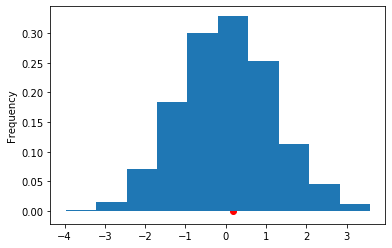

In [47]:
question1 = 'Current smokeless tobacco use among youth'
question2 = "States with strong polices that require retail licenses to sell tobacco products"
year = 2015
simulated, observed = perm_test(data, question1, question2, year)
visualize_test(simulated, observed)

# Null Hypothesis: 

Pval: 0.420000


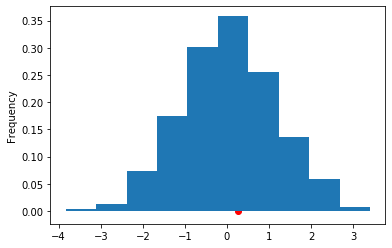

In [51]:
question1 = 'Current cigarette smoking among youth'
question2 = "States with strong polices that require retail licenses to sell tobacco products"
year = 2015
simulated, observed = perm_test(data, question1, question2, year)
visualize_test(simulated, observed)

# Null Hypothesis: 

Pval: 0.382000


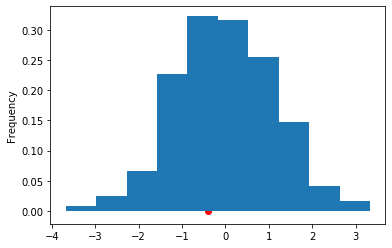

In [52]:
question1 = 'Current smokeless tobacco use among youth'
question2 = 'States that allow stronger local tobacco control and prevention laws'
year = 2015
simulated, observed = perm_test(data, question1, question2, year)
visualize_test(simulated, observed, left=True)

# Null Hypothesis: 

Pval: 0.158000


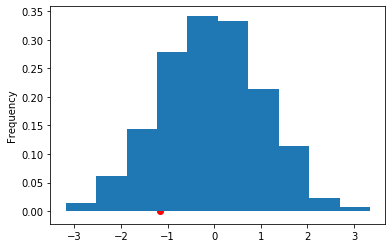

In [53]:
question1 = 'Current cigarette smoking among youth'
question2 = 'States that allow stronger local tobacco control and prevention laws'
year = 2015
simulated, observed = perm_test(data, question1, question2, year)
visualize_test(simulated, observed, left=True)